This code is exploring the construction of a bimodal (two-Gaussian) pdf

In [38]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import scipy.interpolate as scpy
import scipy.optimize as optimization

In [39]:
# Graphics
%matplotlib notebook

In [40]:
# Here's a Weibull function
def pWeibull(r, sigma, eta):
    ''' Weibull function '''
    from numpy import exp
    mu = 1-r
    ret = 2*eta/sigma**2/mu**3 * \
        (((mu**(-2)-1)/sigma**2)**(eta-1)) * \
        exp(-((mu**(-2)-1)/sigma**2)**eta)
    return ret

In [42]:
def func(r, sigma1, sigma2):
    pdf1 = pWeibull(r,sigma1,1.0)*r
    pdf2 = pWeibull(r,sigma2,1.0)*r
    return (pdf1 + pdf2)/2

<IPython.core.display.Javascript object>


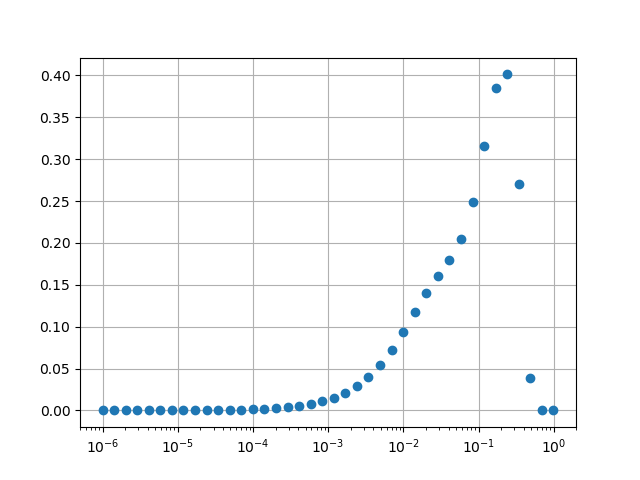

In [45]:
#TRYING THE BIMODAL FIT WITH A WEIGHTED VARIABLE
#practice to fitting points to a Weibull function
r = np.geomspace(1e-6,.99,40)
pdf1 = pWeibull(r,0.2,1.0)*r
pdf2 = pWeibull(r,0.7,1.0)*r
N= 0.8
y = (1-N)*pdf1+pdf2*N

#plot scattered points
plt.figure()
plt.semilogx(r,y,'o')
plt.grid(True)

In [46]:
def func(r, sigma1, sigma2, N):
    pdf1 = pWeibull(r,sigma1,1.0)*r
    pdf2 = pWeibull(r,sigma2,1.0)*r
    return (1-N)*pdf1 + N*pdf2 

In [47]:
x0 = np.array([0.5,0.8, 0.1])
solution, solutionerror = optimization.curve_fit(func, r, y, x0)
best_sigma1 = solution[0]; print(best_sigma1)
best_sigma2 = solution[1]; print(best_sigma2)
best_N = solution[2]; print(best_N)

0.19999999999999998
0.7
0.8000000000000002


<IPython.core.display.Javascript object>


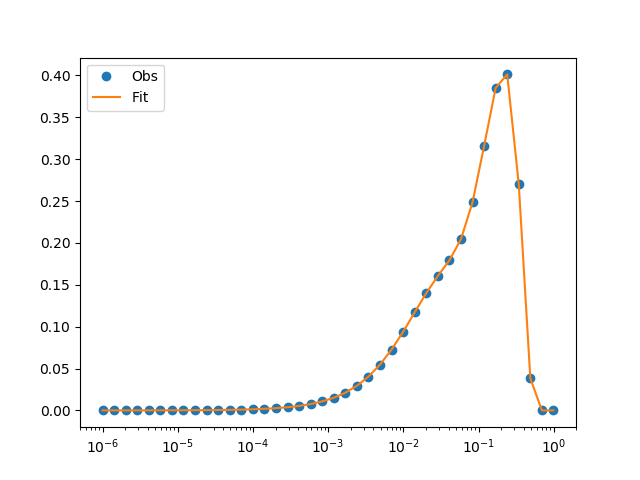

In [48]:
# Testing our found sigma value with an eta of 1.0
plt.figure()
plt.semilogx(r,y,'o',label='Obs')
plt.semilogx(r,func(r, best_sigma1, best_sigma2, best_N), label='Fit')
plt.legend()